Advanced Analytics & Dashboard Design
6.4: Supervised Machine Learning: Regression Part 1

SUMMARY 
1. Import libraries and data
2. Data cleaning
3. Hypothesis
4. Data prep for regression analysis 
5. Regression analysis
6. Summary
7. Export data

In [1]:
# This is importing many different libraries the new ones for this exercise are
# sklearn


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\chocolate_bar_ratings_cleaned3.csv'

In [5]:
choc_bar_ratings_df_clean3= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean3.csv')

In [6]:
# assessing the shape of the data frame real quick 
choc_bar_ratings_df_clean3.shape

(2657, 13)

In [7]:
# assessing the data frame real quick
choc_bar_ratings_df_clean3.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",NaN,3.0,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",NaN,3.0,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",NaN,3.0,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",NaN,3.0,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,NaN,NaN,Mid-level


In [8]:
# # ***Note: this is trying to switch then Na values to say 0 instead of just Na in the 'Rating' column
choc_bar_ratings_df_clean3['Rating'].fillna(0, inplace=True)

In [9]:
# Note: this is trying to swithch the Na values to say 0 instead of just Na in the 'Cocoa Level'
choc_bar_ratings_df_clean3['Cocoa Level'].fillna(0, inplace=True)

In [10]:
choc_bar_ratings_df_clean3.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3.0,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3.0,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3.0,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3.0,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,NaN,Mid-level


In [11]:
# checking what all of the columns names are
choc_bar_ratings_df_clean3.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Most Memorable Characteristics', 'Rating',
       'Num_of_Ingredients', 'Specific Ingredients', 'Cocoa Level',
       'Ingredient Level', 'Rating Level'],
      dtype='object')

In [12]:
# # ***Note: adding a 0 to any 'nan' values in the 'Num_of_Ingredients' flin 35 6.1 
choc_bar_ratings_df_clean3['Num_of_Ingredients'], ['Cocoa Level']['Ingredient Level'].fillna(0).astype(int) 

<>:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\rdpor\AppData\Local\Temp\ipykernel_22576\131623190.py:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  choc_bar_ratings_df_clean3['Num_of_Ingredients'], ['Cocoa Level']['Ingredient Level'].fillna(0).astype(int)
C:\Users\rdpor\AppData\Local\Temp\ipykernel_22576\131623190.py:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  choc_bar_ratings_df_clean3['Num_of_Ingredients'], ['Cocoa Level']['Ingredient Level'].fillna(0).astype(int)
C:\Users\rdpor\AppData\Local\Temp\ipykernel_22576\131623190.py:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  choc_bar_ratings_df_clean3['Num_of_Ingredients'], ['Cocoa Level']['Ingredient Level'].fillna(0).astype(

TypeError: list indices must be integers or slices, not str

In [13]:
choc_bar_ratings_df_clean3['Num_of_Ingredients'] = choc_bar_ratings_df_clean3['Num_of_Ingredients'].fillna(0).astype(int)

In [14]:
choc_bar_ratings_df_clean3['Cocoa Level'] = choc_bar_ratings_df_clean3['Cocoa Level'].fillna(0).astype(int)

ValueError: invalid literal for int() with base 10: 'Low percent'

In [15]:


choc_bar_ratings_df_clean3['Ingredient Level'] = choc_bar_ratings_df_clean3['Ingredient Level'].fillna(0).astype(int)


In [ ]:
# potentially re-order the columns for a better view but if not don't worry # flin 9



In [16]:
# double checking for missing values just so I can be better prepared

choc_bar_ratings_df_clean3.isnull().sum()

Company (Manufacturer)               1
Company Location                     1
Review Date                          1
Country of Bean Origin               1
Specific Bean Origin or Bar Name     1
Cocoa Percent                        0
Most Memorable Characteristics       1
Rating                               0
Num_of_Ingredients                   0
Specific Ingredients                88
Cocoa Level                          0
Ingredient Level                     0
Rating Level                         1
dtype: int64

There are multiple missing values. There are 88 missing values from specific Ingredients and 88 missing values from Ingredient
Level.  There are also 2605 missing values from Cocoa Level and there is 1 missing value from Rating Level.

In [17]:
# What this line of code is doing is checking for duplicates
choc_bar_ratings_df_clean3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2652    False
2653    False
2654    False
2655    False
2656    False
Length: 2657, dtype: bool

In [20]:
# this 'df_duplicates' data frame was created so that the duplicates can have their own seperate data frame
df_duplicates=choc_bar_ratings_df_clean3.duplicated()

In [21]:
df_duplicates.shape

(2657,)

C:\Users\rdpor\AppData\Local\Temp\ipykernel_22576\237375647.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(choc_bar_ratings_df_clean3['Cocoa Percent'], bins=25)


<Axes: xlabel='Cocoa Percent', ylabel='Density'>

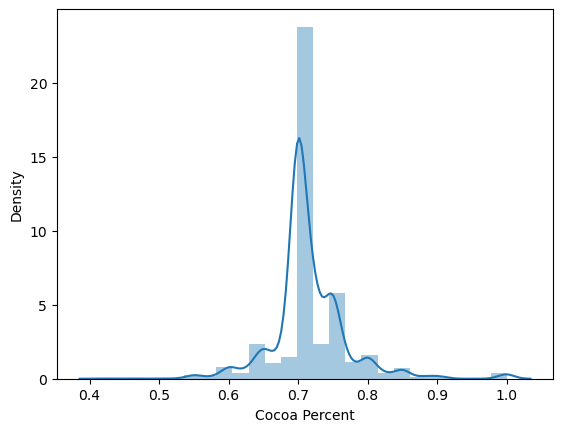

In [22]:
# this code is looking for any extreme values # Flin 14
# ***Question: Terry, is it worth always upgrading to the newest tool? that's why I am seeing this message in pink
sns.distplot(choc_bar_ratings_df_clean3['Cocoa Percent'], bins=25)

What is going on in this particular historgram is that there are many values and outliers at the 0.7 Cocoa Percent.  However we know that from looking at our data analysis of this project from the past; a lot of the chocolate bars are made from the mid-range cocoa percent.  By looking at this we can see that most of the cocoa percrentage values appear to be around 70%.  However, should the analysis and data results change, we will be open to new and different information.  

In [23]:
# What this particular line of code is doing is running a statistical summary of the data frame
# 'choc_bar_ratings_df_clean3'
choc_bar_ratings_df_clean3['Cocoa Percent'].agg(['mean','min', 'median', 'max',])

mean      0.716131
min       0.420000
median    0.700000
max       1.000000
Name: Cocoa Percent, dtype: float64

In [24]:
# in simple terms this code is saying 
# "Hey computer, find the most popular number in this group of numbers,
   #  and tell me what it is." 
def mode(group): return group.mode().iloc[0]  



In [25]:
# what this is doing is getting more statistics on everything
choc_bar_ratings_df_clean3['Cocoa Percent'].agg(['mean','min', 'median', 'max',mode])

mean      0.716131
min       0.420000
median    0.700000
max       1.000000
mode      0.700000
Name: Cocoa Percent, dtype: float64

3 Hypothesis: 
An earlier hypothesis will be looked into now. It is: The chocolate bars that have the highest rating will 
have a midlle level percentage of cocoa.  


 COCOA LEVELS ARE THE FOLLOWING:
 <0.6: "Low percent"
 >= 0.6 and < 0.75: "Mid percent"
 >=0.75 and <1: "High percent"
 1= "Completely Cocoa"


4.  THIS NEXT SECTION WILL COVER DATA PREPERATION FOR THE REGRESSION ANALYSIS

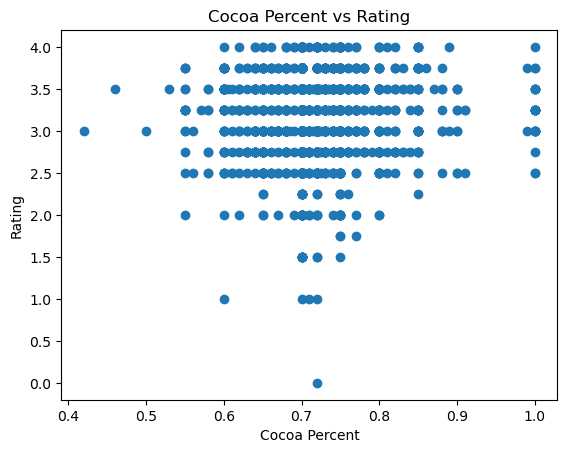

In [27]:
# The code is making a scatterplot that helps anyone
# see if there's any connection between how much cocoa each chocolate
# bar has and how much they are liked. It's like trying to understand
# if you prefer chocolates with more or less cocoa! # flin 18
# note: the independent variable (cocoa percent) is effeccting the dependent variable (rating)

import matplotlib.pyplot as plt
plt.scatter(x=choc_bar_ratings_df_clean3['Cocoa Percent'], y=choc_bar_ratings_df_clean3['Rating'], marker='o')
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = choc_bar_ratings_df_clean3['Cocoa Percent'].values.reshape(-1,1)
y = choc_bar_ratings_df_clean3['Rating'].values.reshape(-1,1)

In [30]:
#checking y values
y

array([[3.25],
       [2.75],
       [3.  ],
       ...,
       [2.75],
       [2.5 ],
       [0.  ]])

In [31]:
#checking x values # flin 22
X

array([[0.76],
       [0.76],
       [0.76],
       ...,
       [0.75],
       [0.7 ],
       [0.72]])

In [32]:
#  What this line of code below is doing is splitting the data 
# into a training set and into a test set. # Flin 22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5. THIS IS THE REGRESSION ANALYSIS

In [33]:
# What this line of code below does is creates a regression object. #flin 23
# This is the regression object and it  will be fit onto the training set.

regression = LinearRegression()  

In [34]:
# What this line of code is doing is fitting the regression object onto the training set in the best way. 

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# What this line of code is doing is predicting the values of y using X.

y_predicted = regression.predict(X_test)

In [36]:
# What this line of code is doing is creating particular objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [37]:
# What this line of code is doing is printing the model summary statistics and also evaluating the performance of the model


print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17826668]]
Mean squared error:  0.18046692707049794
R2 score:  -0.00030517835961729745


In [38]:
# This line of code is predicting outputs (y_predicted)
# for a given set of inputs (X_test).
# The predictions are then stored in 
# the variable y_predicted for later use or evaluation.

y_predicted

array([[3.19034996],
       [3.19034996],
       [3.16360996],
       [3.19034996],
       [3.19034996],
       [3.19034996],
       [3.19926329],
       [3.21174196],
       [3.19213262],
       [3.18678462],
       [3.19391529],
       [3.19034996],
       [3.19034996],
       [3.19926329],
       [3.19748063],
       [3.19391529],
       [3.19034996],
       [3.21708996],
       [3.18500196],
       [3.16360996],
       [3.19569796],
       [3.19569796],
       [3.19391529],
       [3.19034996],
       [3.19569796],
       [3.19034996],
       [3.18678462],
       [3.19034996],
       [3.18321929],
       [3.19034996],
       [3.19391529],
       [3.19034996],
       [3.19034996],
       [3.19926329],
       [3.20817663],
       [3.19748063],
       [3.21708996],
       [3.18678462],
       [3.19034996],
       [3.19391529],
       [3.19034996],
       [3.19926329],
       [3.19034996],
       [3.20817663],
       [3.19034996],
       [3.19034996],
       [3.19926329],
       [3.193

In [39]:
# This line of code is creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,4.00,3.190350
1,3.00,3.190350
2,3.75,3.163610
3,3.75,3.190350
4,2.50,3.190350
5,3.25,3.190350
6,3.75,3.199263
7,3.50,3.211742
8,3.25,3.192133
9,3.00,3.186785


In [40]:
# What this line of code is doing is predicting the X_train

y_predicted_train = regression.predict(X_train)

In [41]:
# What these lines of code are doing is  evaluating how accurate 
# the model's predictions (y_predicted_train) are compared to the
# real answers (y_train). The mean squared error (MSE) and R-squared (R2)
# score give insights into how well the model is performing.


rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
# These are printing the important values below
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17826668]]
Mean squared error:  0.20642390472248537
R2 score:  0.0004683966491362268


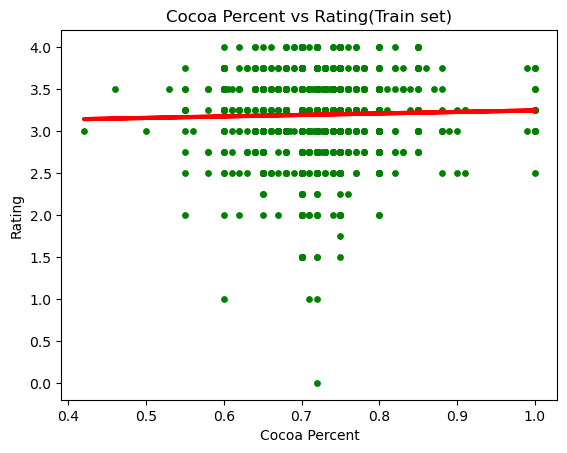

In [43]:
# What this code does is create a scatterplot of the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating(Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [ ]:
# What this code does is create a dataframe that displays 
# the actual values and the predicted values for the 
# first 25 instances. It's a handy way to compare how 
# well the model is predicting compared to the real data.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(25)

In [ ]:
choc_bar_ratings_df_clean3.to_csv(os.path.join(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean4.csv'), index=False)


SUMMARY: 
In reviewing the model's performance on the training set, it's clear that the predictions are not aligning well with the actual values. Notably, instances such as row 0 (actual = 2.50, predicted = 3.214826) and row 12 (actual = 4.00, predicted = 3.214826) reveal substantial disparities, which seem to be consistent throughout the dataset.

It's vitally important to acknowledge the inherent subjectivity in chocolate bar ratings, as taste preferences can vary widely among individuals. While previous analyses have suggested that chocolate bars with mid-level cocoa percentages tend to receive higher ratings, the current model doesn't seem to effectively capture the nuanced relationship between cocoa percentages and ratings.

In summary, the model's performance raises concerns about its ability to accurately predict ratings based on cocoa percentages. Further refinement and consideration of additional features or alternative modeling approaches may be necessary to enhance predictive accuracy.
